In [45]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import seaborn as sns

from dotenv.main import load_dotenv
import os

load_dotenv(override=True)

True

In [46]:
from matplotlib import rc

# Set Times New Roman font globally
rc('font', family='serif', serif='Times New Roman')
plt.rcParams.update({'font.size': 14})
rc('mathtext', fontset='custom', rm='Times New Roman')

In [47]:
df = pd.read_csv('../../data/final_daily_returns_asset_classes.csv', index_col=0)
df.index = pd.to_datetime(df.index)

In [48]:
frac_liabilities = float(os.getenv('FRAC_LIABILITIES'))
assets0 = 1000000
liabilities0 = assets0 * frac_liabilities 
bof_0 = assets0 - liabilities0

In [49]:
def load_pareto_fronts(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    
    all_runs = []
    for entry in data:
        pareto_front = []
        for solution in entry.get("solutions", []):
            # Ensure solution is a dictionary
            if isinstance(solution, dict):
                pareto_front.append({
                    "weights": solution.get("weights", []),
                    "expected_return": solution.get("expected_return", 0),
                    "SCR_risk": solution.get("SCR_risk", 0),
                    "risk_measure": solution.get("risk_measure", ""),
                    "distribution": solution.get("distribution", ""),
                    "period": solution.get("period", [])
                })
        all_runs.append(pareto_front)
    return all_runs

json_file_path = "../pareto_front_results.json"
pareto_fronts = load_pareto_fronts(json_file_path)

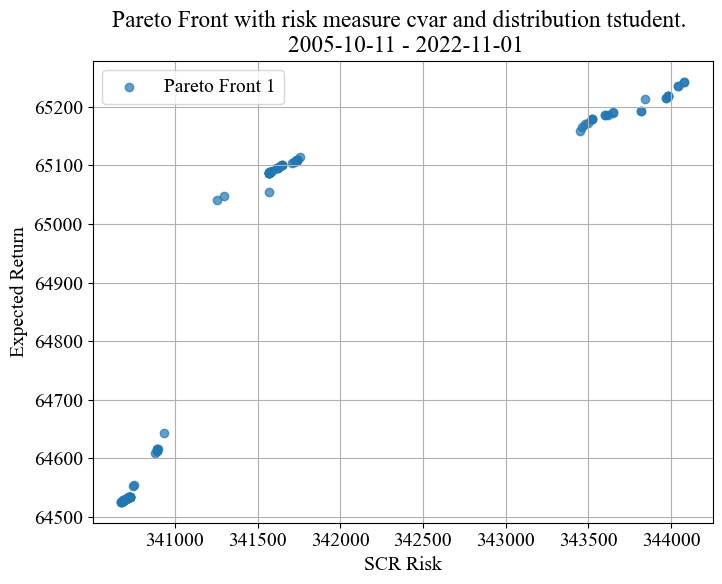

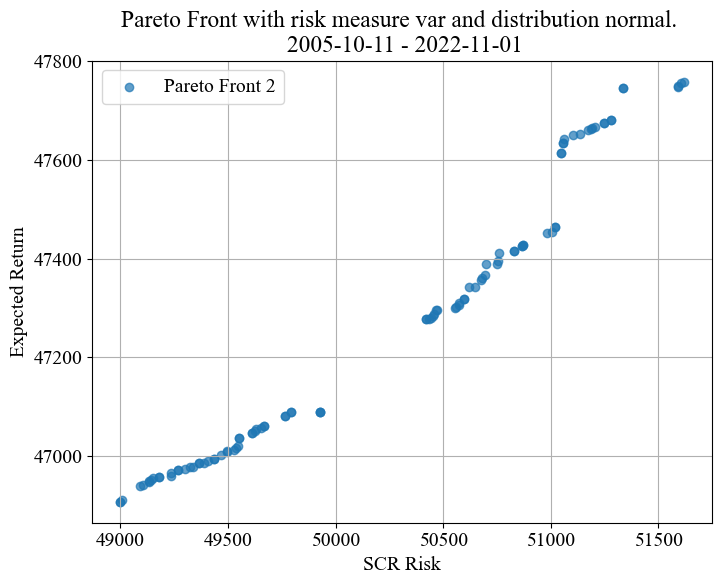

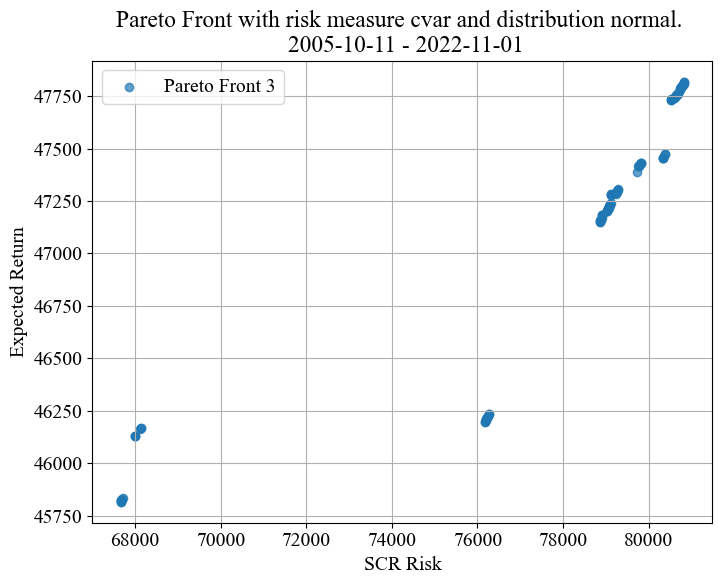

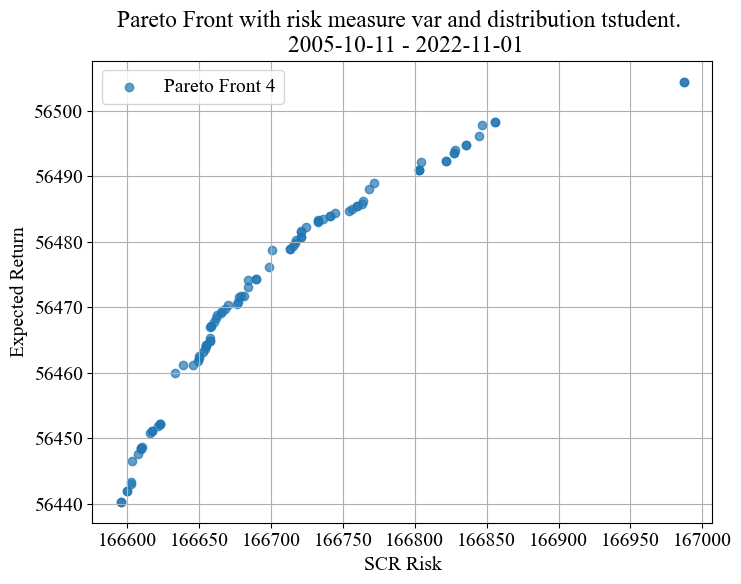

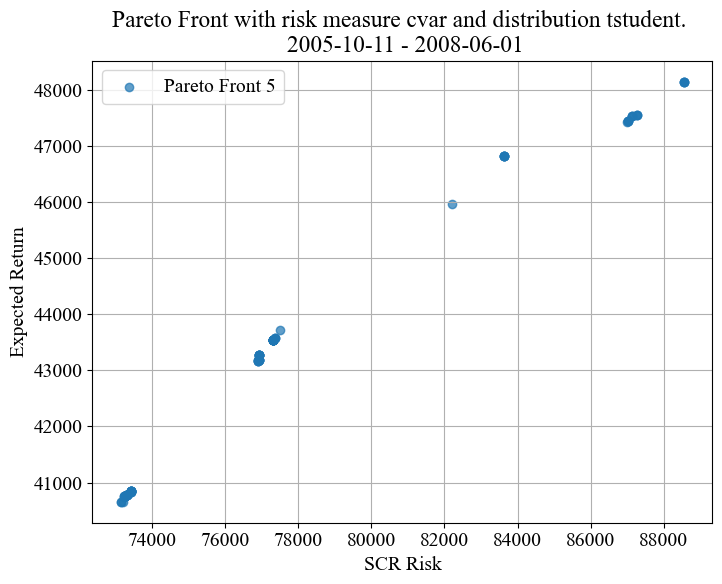

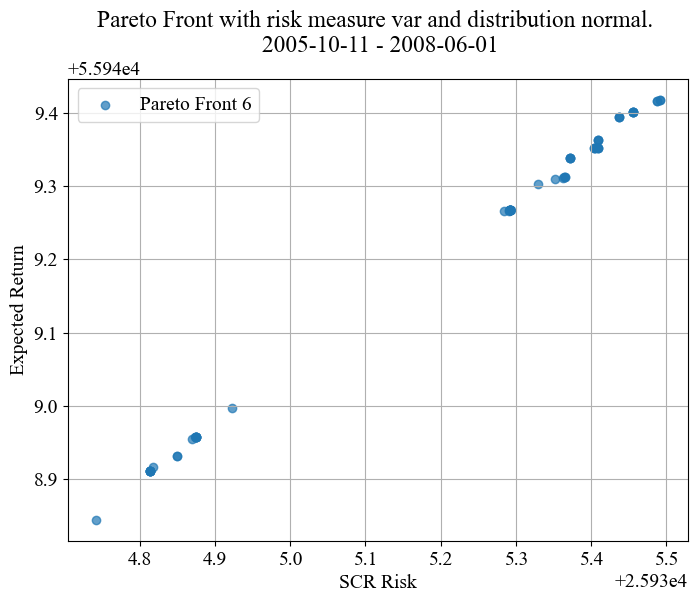

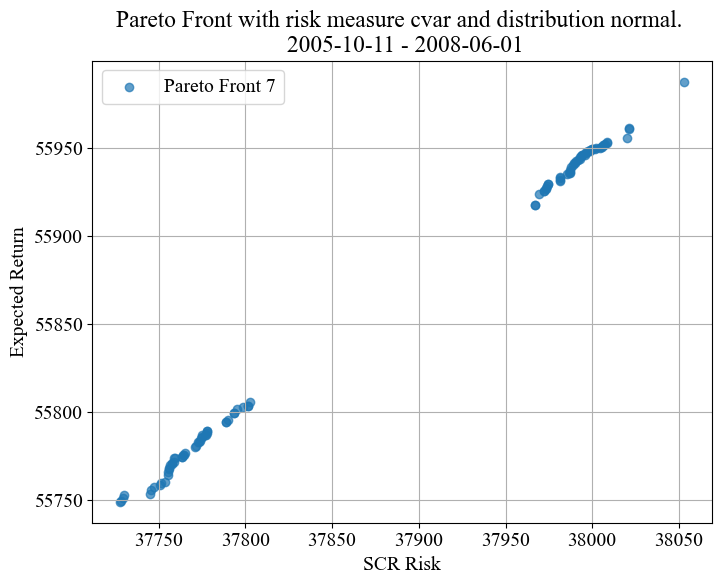

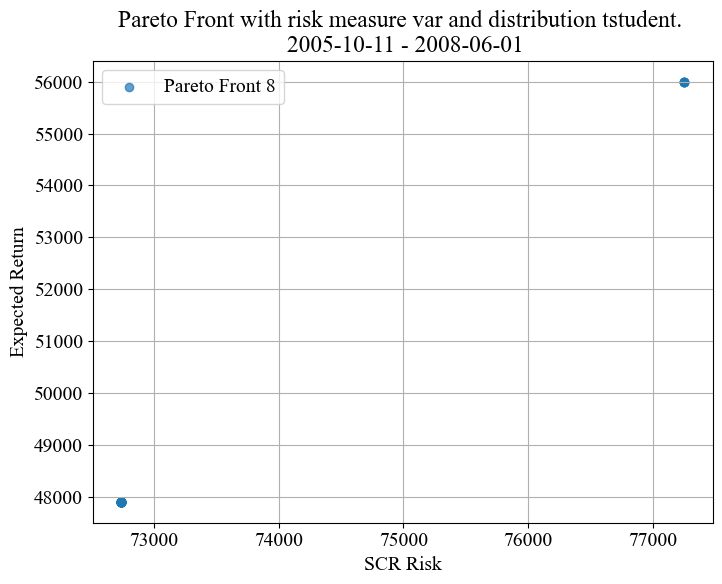

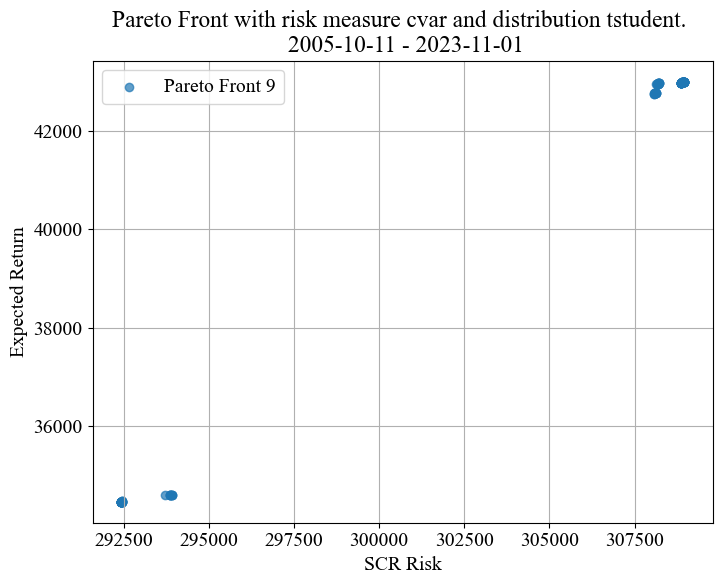

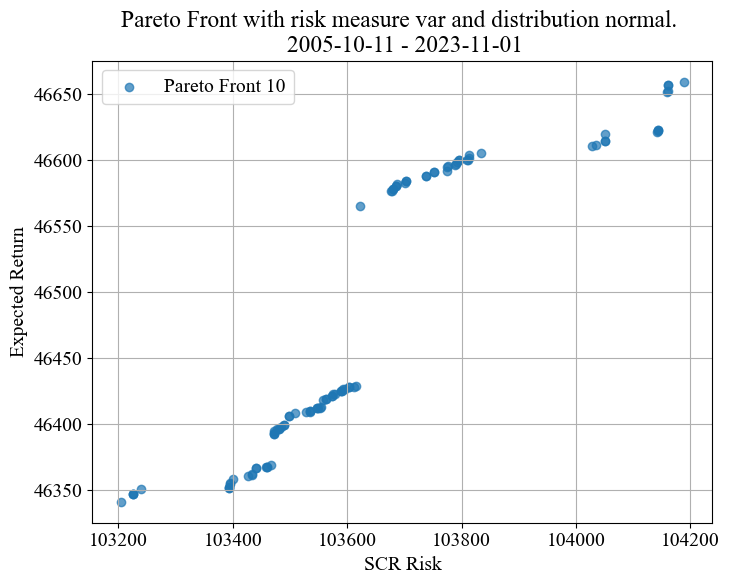

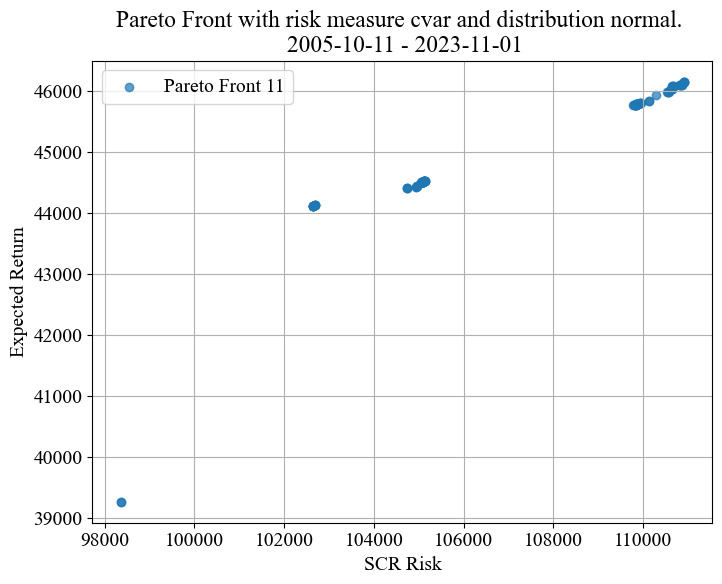

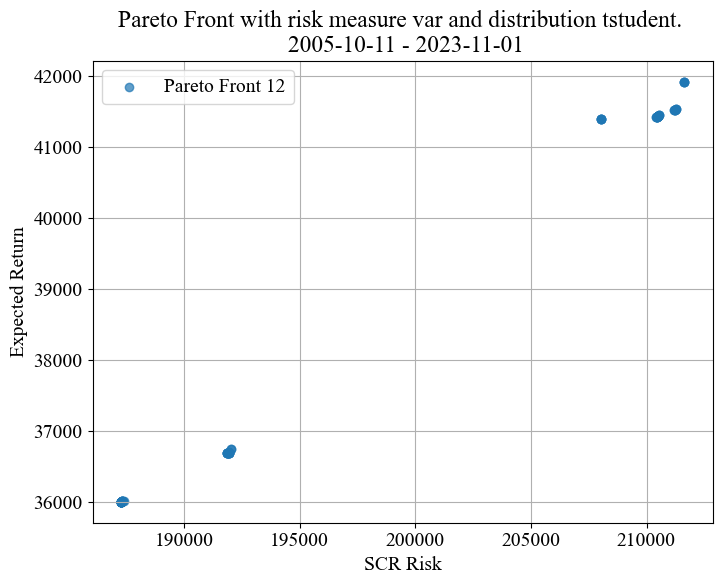

In [50]:
for i, pareto_front in enumerate(pareto_fronts, start=1):
    scr_risks = [solution["SCR_risk"] for solution in pareto_front]
    expected_returns = [solution["expected_return"] for solution in pareto_front]
    risk_measure = pareto_front[0]['risk_measure']
    distribution = pareto_front[0]['distribution']
    p1, p2 = pareto_front[0]['period'][0], pareto_front[0]['period'][1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(scr_risks, expected_returns, label=f'Pareto Front {i}', alpha=0.7)
    plt.title(f'Pareto Front with risk measure {risk_measure} and distribution {distribution}. \n 2005-10-11 - {p2}')
    plt.xlabel('SCR Risk')
    plt.ylabel('Expected Return')
    plt.legend()
    plt.grid(True)
    plt.show()

## Plotting for each Time period

In [51]:
scenarios = {
    "2007-06-01varnormal" : "A1",
    "2007-06-01cvarnormal" : "A2",
    "2007-06-01vartstudent" : "A3",
    "2007-06-01cvartstudent" : "A4",
    "2021-11-01varnormal" : "B1",
    "2021-11-01cvarnormal" : "B2",
    "2021-11-01vartstudent" : "B3",
    "2021-11-01cvartstudent" : "B4",
    "2022-11-01varnormal" : "C1",
    "2022-11-01cvarnormal" : "C2",
    "2022-11-01vartstudent" : "C3",
    "2022-11-01cvartstudent" : "C4",
}

In [52]:
t1 = ("2021-11-01", "2022-11-01")
t2 = ("2007-06-01", "2008-06-01")
t3 = ("2022-11-01", "2023-11-01")

t = [t1,t2,t3]

In [53]:
def plot_pareto_fronts_scr_risk(pareto_fronts):
    """
    Plot Pareto fronts with SCR risk on the x-axis and expected return on the y-axis.

    Parameters:
    - pareto_fronts: List of Pareto fronts, each containing dictionaries with "SCR_risk" and "expected_return".
    - scenarios: Dictionary mapping scenario keys to their labels for legend sorting.
    """
    # Create a plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Generate a colormap for Pareto fronts
    cmap = plt.cm.get_cmap("tab10", len(pareto_fronts))  # Use 'tab10' colormap for distinct colors

    # Store legend items in a dictionary for sorting
    legend_items = {}

    # Plot Pareto fronts
    for i, pareto_front in enumerate(pareto_fronts):
        # Extract SCR risk and expected return
        scr_risks = [solution["SCR_risk"]/bof_0 for solution in pareto_front]
        expected_returns = [solution["expected_return"]/assets0 for solution in pareto_front]

        # Get scenario label from scenarios dictionary
        end_test_period = pareto_front[0]["period"][0]
        risk_measure = pareto_front[0]["risk_measure"]
        distribution = pareto_front[0]["distribution"]
        scenario_key = end_test_period + risk_measure + distribution
        scenario_label = scenarios[scenario_key]

        # Use the same color for all portfolios in this Pareto front
        color = cmap(i)

        # Add scatter plot to the axes
        scatter = ax.scatter(scr_risks, expected_returns, label=scenario_label, color=color, alpha=0.7, edgecolors="k")
        
        # Store the label and corresponding scatter in the dictionary
        legend_items[scenario_label] = scatter

    # Create the legend with sorted labels
    sorted_legend_items = sorted(legend_items.items(), key=lambda x: x[0])  # Sort by label (key)
    sorted_labels = [item[0] for item in sorted_legend_items]
    sorted_handles = [item[1] for item in sorted_legend_items]
    ax.legend(sorted_handles, sorted_labels, fontsize=12)

    # Customize the plot
    plt.title("Pareto Fronts with SCR Risk and Expected Return", fontsize=16)
    plt.xlabel(r"SCR Risk", fontsize=14)
    plt.ylabel(r"$r_p$ - Expected Return", fontsize=14)
    plt.tight_layout()
    plt.show()

TIME PERIOD: ('2021-11-01', '2022-11-01')


C:\Users\nicka\AppData\Local\Temp\ipykernel_1588\395601854.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(pareto_fronts))  # Use 'tab10' colormap for distinct colors


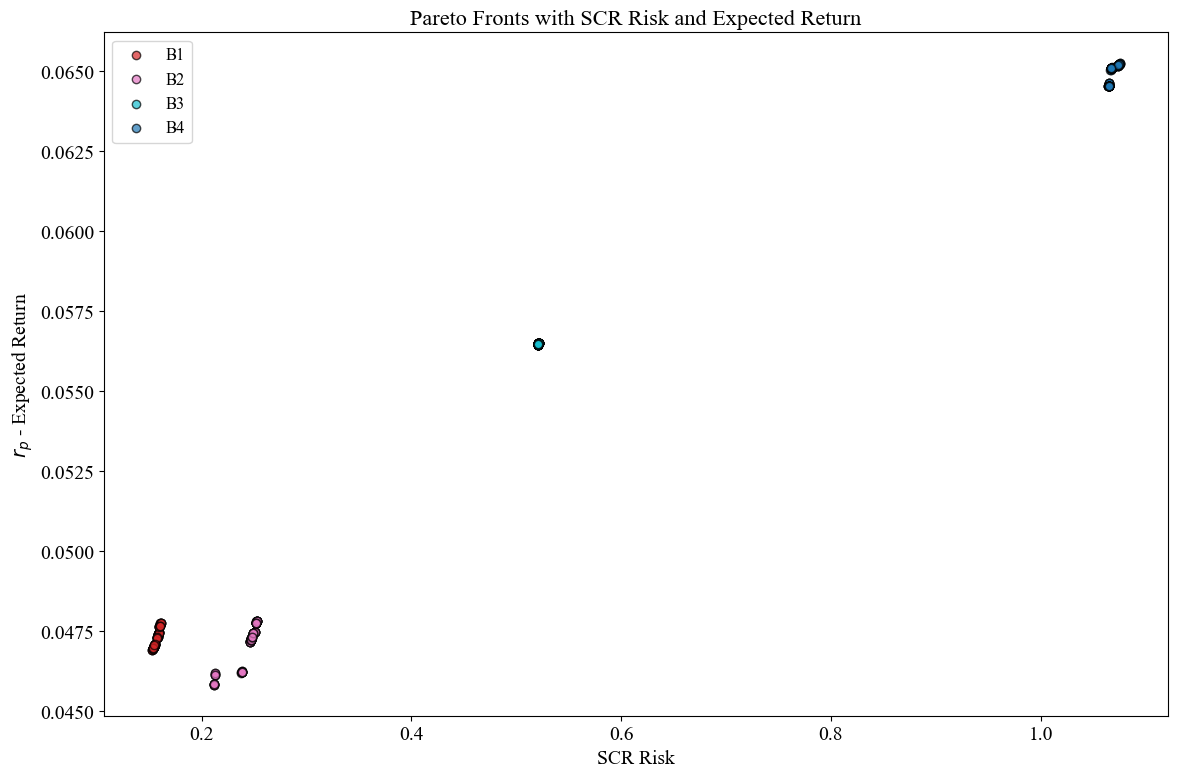

TIME PERIOD: ('2007-06-01', '2008-06-01')


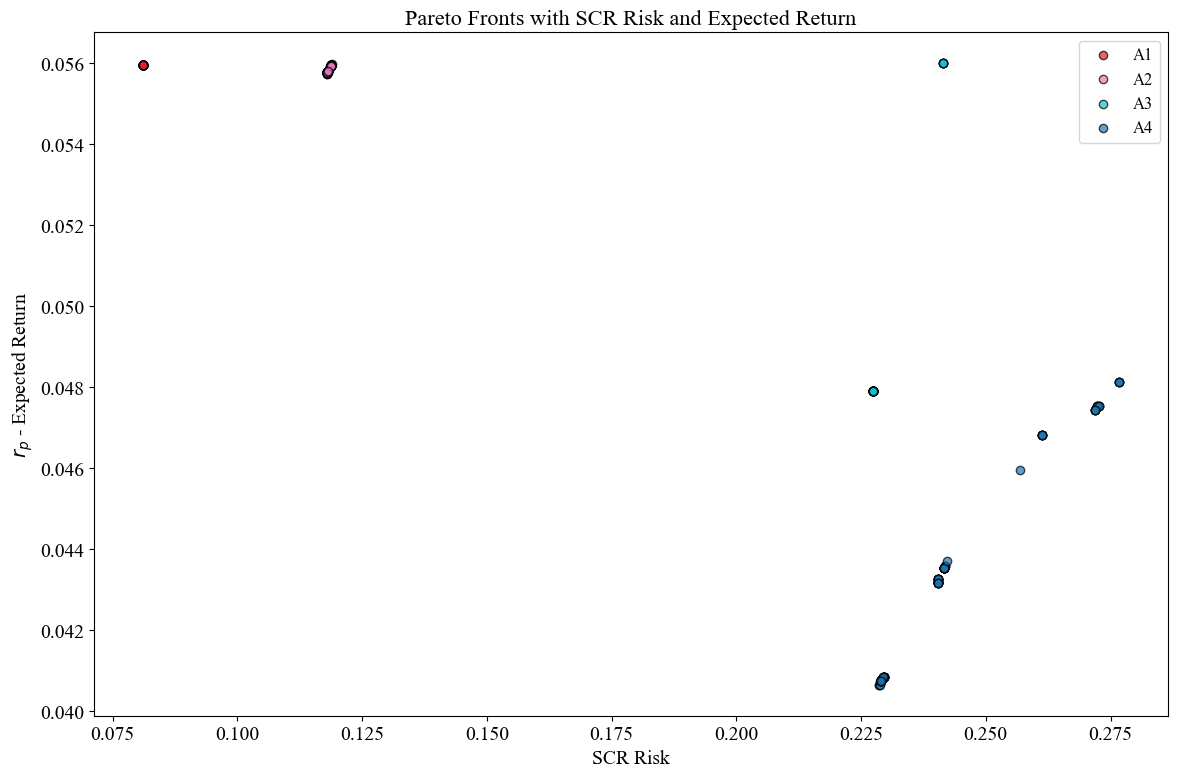

TIME PERIOD: ('2022-11-01', '2023-11-01')


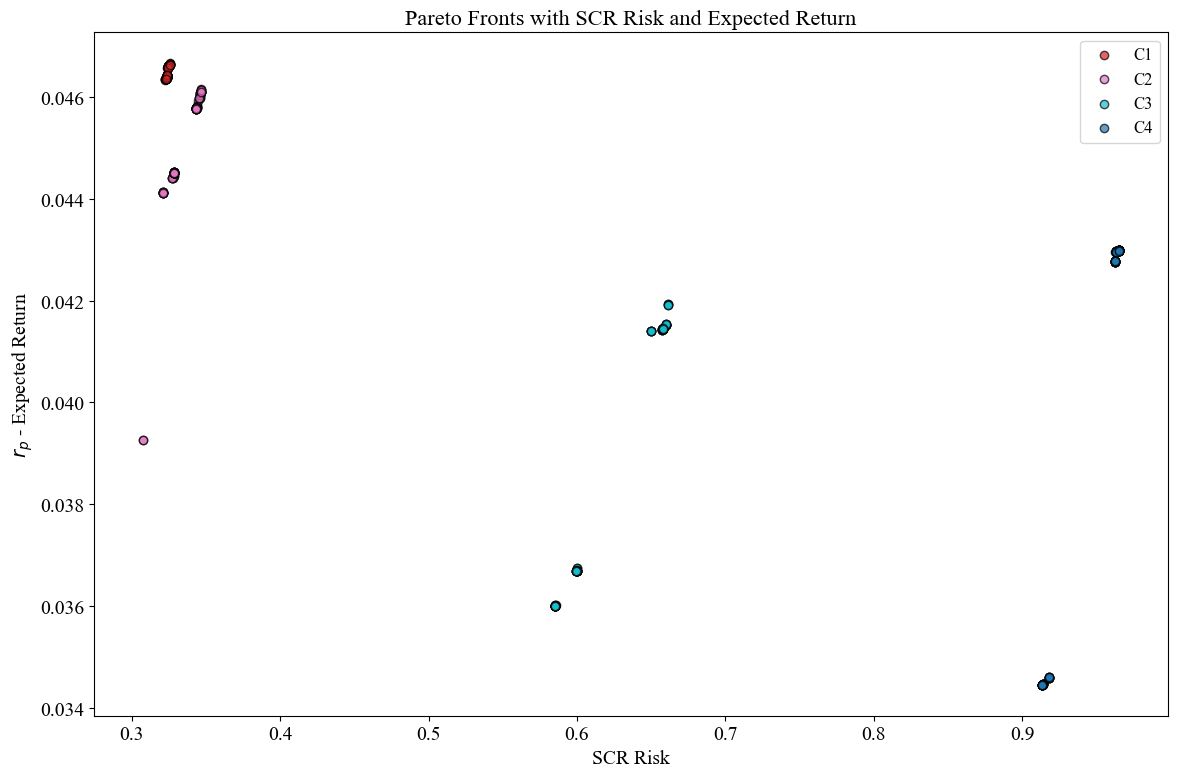

In [54]:
for i in t:
    new_df = df[(df.index <= i[0])]
    print("TIME PERIOD:", i)
    valid_pareto_fronts = []
    for pareto_front in pareto_fronts:
        portfolio = pareto_front[0]
        start_test_period = portfolio["period"][0]

        if i[0] == start_test_period:
            valid_pareto_fronts.append(pareto_front)
            continue

    plot_pareto_fronts_scr_risk(valid_pareto_fronts)